In [1]:
import numpy as np
from neutral_network_kavod import NNK

In [2]:
nnk = NNK([1,4,1],8)
X = np.arange(0,0.5,0.001).reshape(500,1)
Y = (np.arange(0,0.5,0.001)*2).reshape(500,1)
for i in range(10000):
    nnk.train(X,Y)
nnk.predict(np.array([[0.2]]),verbose=True)

1:[[0.2]]
2:[[0.62305211 0.62305211 0.62305211 0.62305211]]


array([[4.15283663e-21]])

In [19]:
nnk.predict(np.array([[0.4]]),verbose=True)

1:[[0.4]]
2:[[0.00079345 0.00079345 0.00079345 0.00079345]]


array([[0.49811523]])

In [2]:
nnk = NNK([1,2,3],1/2)

In [3]:
nnk.weights

[array([[0.5, 0.5]]), array([[0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]])]

In [4]:
nnk.predict(np.array([[2]]))

array([0.5, 0.5, 0.5])

In [5]:
nnk.backward(np.array([[1,2,3]]))

[[0.07780742 0.23342225 0.38903708]
 [0.07780742 0.23342225 0.38903708]]


In [6]:
nnk = NNK([1,2,3],2)
for i in range(100):
    nnk.train(np.array([[2]]),np.array([[1,2,3]]))

[[0.11009963 0.3302989  0.55049817]
 [0.11009963 0.3302989  0.55049817]]
[[0.00927    0.04824696 0.04522805]
 [0.00927    0.04824696 0.04522805]]
[[0.00655637 0.032638   0.0289664 ]
 [0.00655637 0.032638   0.0289664 ]]
[[0.00619807 0.02866896 0.02567653]
 [0.00619807 0.02866896 0.02567653]]
[[0.0059029  0.02563535 0.0231493 ]
 [0.0059029  0.02563535 0.0231493 ]]
[[0.005638   0.0231874  0.02108457]
 [0.005638   0.0231874  0.02108457]]
[[0.00539803 0.02116923 0.019364  ]
 [0.00539803 0.02116923 0.019364  ]]
[[0.00517916 0.01947635 0.01790727]
 [0.00517916 0.01947635 0.01790727]]
[[0.00497841 0.0180357  0.01665743]
 [0.00497841 0.0180357  0.01665743]]
[[0.0047934  0.01679462 0.01557295]
 [0.0047934  0.01679462 0.01557295]]
[[0.00462221 0.01571421 0.01462277]
 [0.00462221 0.01571421 0.01462277]]
[[0.00446325 0.01476506 0.01378321]
 [0.00446325 0.01476506 0.01378321]]
[[0.00431516 0.01392456 0.01303587]
 [0.00431516 0.01392456 0.01303587]]
[[0.00417682 0.01317501 0.01236626]
 [0.00417682 0.

In [7]:
nnk.signoid(500,1)

1.0

In [8]:
nnk.predict(np.array([[2]]))

array([[0.96587982, 0.99762113, 0.99883119]])

In [9]:
nnk.values[1]

array([[0.98014181, 0.98014181]])

In [10]:
nnk.deltas[2]

array([[0.0011342 , 0.00240165, 0.00235834]])

In [11]:
nnk.deltas[2].dot(nnk.weights[1].T)*(nnk.values[1] * (1 - nnk.values[1]))

array([[0.00016987, 0.00016987]])

In [12]:
nnk.values[1].T

array([[0.98014181],
       [0.98014181]])

In [17]:
#X = np.array([[2]])
#y = np.array([[1,2,3]])
syn0 = 2*np.random.random((1,5)) - 1
syn1 = 2*np.random.random((5,1)) - 1
for i in range(100000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    l2_delta = (Y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)
l1 = 1/(1+np.exp(-(np.dot(np.array([[0.3]]),syn0))))
l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
l2

array([[8.70176448e-11]])

In [14]:
syn0.shape,syn1.shape

((1, 2), (2, 3))

In [15]:
l1.shape,l2.shape

((1, 2), (1, 3))

In [16]:
l1_delta.shape,l2_delta.shape

((1, 2), (1, 3))

In [17]:
l1 * (1 - l1)

array([[0.11552581, 0.1976167 ]])

In [18]:
l2_delta.dot(syn1.T)

array([[0.4555954 , 0.29187027]])

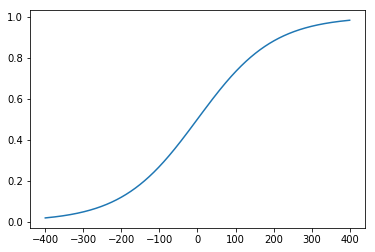

In [21]:
import matplotlib.pyplot as plt
t1 = np.arange(-400.0, 400.0, 0.1)
def signoid(x,t):
    return 1/(1+np.exp(-(t*x)))
plt.plot(t1,signoid(t1,1/100))
plt.show()

In [20]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
for j in range(1,1000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    print(l1.T.dot(l2_delta))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)
l2

[[0.02877059]
 [0.02803786]
 [0.02661494]
 [0.04824781]]
[[0.01656195]
 [0.01659779]
 [0.0152226 ]
 [0.03184095]]
[[0.00891781]
 [0.00940012]
 [0.00815854]
 [0.02153433]]
[[0.00422441]
 [0.0049713 ]
 [0.0038433 ]
 [0.01520664]]
[[0.00136053]
 [0.00226919]
 [0.00121429]
 [0.01135839]]
[[-0.00038498]
 [ 0.00062639]
 [-0.00039074]
 [ 0.00903057]]
[[-0.0014501 ]
 [-0.00037042]
 [-0.00137533]
 [ 0.00762987]]
[[-0.00210199]
 [-0.00097426]
 [-0.0019841 ]
 [ 0.00679337]]
[[-0.00250311]
 [-0.00133938]
 [-0.00236519]
 [ 0.00629998]]
[[-0.0027522 ]
 [-0.00155961]
 [-0.00260841]
 [ 0.0060152 ]]
[[-0.00290923]
 [-0.00169202]
 [-0.00276819]
 [ 0.00585728]]
[[-0.00301059]
 [-0.00177125]
 [-0.00287757]
 [ 0.00577658]]
[[-0.00307838]
 [-0.00181834]
 [-0.00295655]
 [ 0.00574295]]
[[-0.00312598]
 [-0.00184606]
 [-0.00301727]
 [ 0.00573811]]
[[-0.00316152]
 [-0.00186213]
 [-0.00306708]
 [ 0.005751  ]]
[[-0.0031899 ]
 [-0.00187122]
 [-0.00311042]
 [ 0.0057749 ]]
[[-0.00321411]
 [-0.00187618]
 [-0.00315   ]

[[-0.00397769]
 [ 0.0007675 ]
 [-0.0071563 ]
 [ 0.0064631 ]]
[[-0.00395204]
 [ 0.00076239]
 [-0.00711488]
 [ 0.0064259 ]]
[[-0.00392667]
 [ 0.00075733]
 [-0.00707386]
 [ 0.00638906]]
[[-0.00390158]
 [ 0.00075233]
 [-0.00703322]
 [ 0.00635257]]
[[-0.00387677]
 [ 0.00074739]
 [-0.00699298]
 [ 0.00631644]]
[[-0.00385223]
 [ 0.0007425 ]
 [-0.00695311]
 [ 0.00628065]]
[[-0.00382796]
 [ 0.00073767]
 [-0.00691363]
 [ 0.0062452 ]]
[[-0.00380396]
 [ 0.00073288]
 [-0.00687451]
 [ 0.00621009]]
[[-0.00378021]
 [ 0.00072816]
 [-0.00683576]
 [ 0.00617532]]
[[-0.00375673]
 [ 0.00072348]
 [-0.00679738]
 [ 0.00614088]]
[[-0.0037335 ]
 [ 0.00071885]
 [-0.00675936]
 [ 0.00610676]]
[[-0.00371051]
 [ 0.00071428]
 [-0.00672169]
 [ 0.00607296]]
[[-0.00368778]
 [ 0.00070975]
 [-0.00668437]
 [ 0.00603949]]
[[-0.00366529]
 [ 0.00070528]
 [-0.0066474 ]
 [ 0.00600633]]
[[-0.00364303]
 [ 0.00070085]
 [-0.00661078]
 [ 0.00597348]]
[[-0.00362102]
 [ 0.00069647]
 [-0.00657449]
 [ 0.00594093]]
[[-0.00359923]
 [ 0.0006

 [ 0.00193336]]
[[-0.00109889]
 [ 0.0002035 ]
 [-0.00209024]
 [ 0.0019293 ]]
[[-0.00109653]
 [ 0.00020305]
 [-0.00208574]
 [ 0.00192525]]
[[-0.00109417]
 [ 0.00020261]
 [-0.00208126]
 [ 0.00192122]]
[[-0.00109182]
 [ 0.00020216]
 [-0.00207679]
 [ 0.00191721]]
[[-0.00108948]
 [ 0.00020172]
 [-0.00207234]
 [ 0.00191321]]
[[-0.00108715]
 [ 0.00020129]
 [-0.00206792]
 [ 0.00190923]]
[[-0.00108483]
 [ 0.00020085]
 [-0.00206351]
 [ 0.00190526]]
[[-0.00108252]
 [ 0.00020041]
 [-0.00205911]
 [ 0.00190132]]
[[-0.00108021]
 [ 0.00019998]
 [-0.00205474]
 [ 0.00189738]]
[[-0.00107792]
 [ 0.00019955]
 [-0.00205038]
 [ 0.00189346]]
[[-0.00107564]
 [ 0.00019912]
 [-0.00204604]
 [ 0.00188956]]
[[-0.00107337]
 [ 0.00019869]
 [-0.00204172]
 [ 0.00188567]]
[[-0.0010711 ]
 [ 0.00019827]
 [-0.00203741]
 [ 0.0018818 ]]
[[-0.00106885]
 [ 0.00019784]
 [-0.00203312]
 [ 0.00187795]]
[[-0.0010666 ]
 [ 0.00019742]
 [-0.00202885]
 [ 0.0018741 ]]
[[-0.00106436]
 [ 0.000197  ]
 [-0.0020246 ]
 [ 0.00187028]]
[[-0.001

array([[0.04689137],
       [0.94298774],
       [0.9692406 ],
       [0.04992098]])